In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Amsterdam ['availability_365'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
9659 non-null   int64
dtypes: int64(1)
memory usage: 75.6 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam ['availability_365'].max()
Min = Amsterdam ['availability_365'].min()
Limites = [Min, Max]
Limites

[0, 365]

In [6]:
# Calculamos el rango R
R = Max - Min
R

365

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

25.650080576532858

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0, 365, 15)
intervalos

array([  0.        ,  26.07142857,  52.14285714,  78.21428571,
       104.28571429, 130.35714286, 156.42857143, 182.5       ,
       208.57142857, 234.64285714, 260.71428571, 286.78571429,
       312.85714286, 338.92857143, 365.        ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Amsterdam ['availability_365'] = pd.cut ( x = Amsterdam  ['availability_365'], bins = intervalos, labels = categorias )
Amsterdam ['availability_365']

0               NaN
1               NaN
2        Categoria1
3               NaN
4        Categoria8
           ...     
9654     Categoria9
9655     Categoria7
9656     Categoria8
9657    Categoria13
9658    Categoria13
Name: availability_365, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [12]:
table1 = freq_tbl(Amsterdam ['availability_365'])
table1

,availability_365,frequency,percentage,cumulative_perc
0,Categoria1,1490,0.154260,0.241217
1,Categoria2,643,0.066570,0.345313
2,Categoria3,527,0.054561,0.430630
3,Categoria14,498,0.051558,0.511251
4,Categoria4,464,0.048038,0.586369
5,Categoria10,359,0.037167,0.644488
6,Categoria6,329,0.034061,0.697750
7,Categoria7,322,0.033337,0.749879
8,Categoria13,292,0.030231,0.797151
9,Categoria5,289,0.029920,0.843937


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,availability_365,frequency
0,Categoria1,1490
1,Categoria2,643
2,Categoria3,527
3,Categoria14,498
4,Categoria4,464
5,Categoria10,359
6,Categoria6,329
7,Categoria7,322
8,Categoria13,292
9,Categoria5,289


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('availability_365')
Filtro_index

,frequency
availability_365,
Categoria1,1490
Categoria2,643
Categoria3,527
Categoria14,498
Categoria4,464
Categoria10,359
Categoria6,329
Categoria7,322
Categoria13,292


Text(0, 0.5, 'Frecuencia')

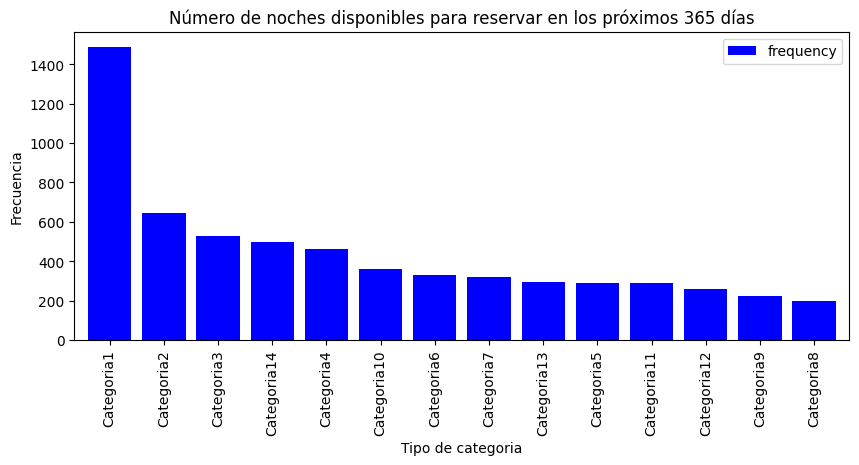

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches disponibles para reservar en los próximos 365 días')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')